# Data Analysis 

### Seorim Park, MATH517 team 2 project 1

## 1. Number of deaths from COVID-19 and risk factors
## 2. Case of COVID-19 and the influence of geolocation in the number of cases

## 1. Number of deaths from COVID-19 and risk factors 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import datetime as dt
import matplotlib.dates as mdates
df=pd.read_csv('../Data/Provisional_COVID-19_Deaths_by_Place_of_Death_and_Age.csv')


In [2]:
dfdeath=df[['State','Total Deaths','COVID-19 Deaths','Place of Death','Age group','End Date','Start Date']]
dfdeath=dfdeath.dropna()
dfdeath=dfdeath[dfdeath['Total Deaths']!=0]
dfdeath=dfdeath[dfdeath['COVID-19 Deaths']!=0]
dfdeath=dfdeath[dfdeath['End Date']=='09/25/2021']
dfdeath=dfdeath[dfdeath['Start Date']=='01/01/2020']
dfdeath1=dfdeath[dfdeath['Age group']=='All Ages']

dfdeath1=dfdeath1[dfdeath1['Place of Death']=='Total - All Places of Death']


In [3]:
label=dfdeath1["State"].unique()
def plotdeath(df):
    df=np.array(df)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    darray=np.array(df)
    perc=darray[:,2]/darray[:,1]
    ax.bar(label,perc)
    plt.title("Proportion of COVID-19 Deaths over the total Deaths in different states")
    plt.xlabel("States")
    plt.ylabel("Percentage")
    plt.show()


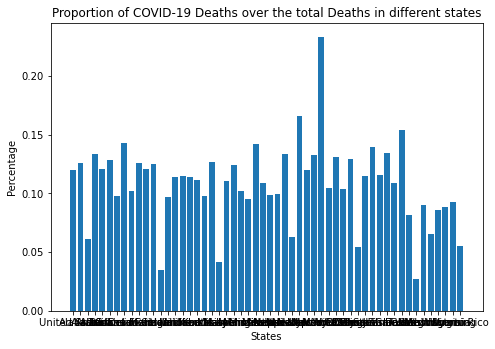

In [4]:
plotdeath(dfdeath1)

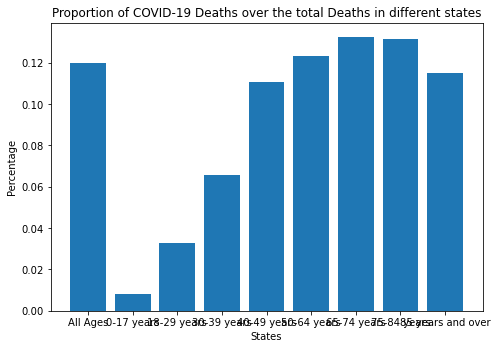

In [5]:
dfdeath2=dfdeath[dfdeath['State']=='United States']
dfdeath2=dfdeath2[dfdeath2['Place of Death']=='Total - All Places of Death']
label=dfdeath["Age group"].unique()
plotdeath(dfdeath2)

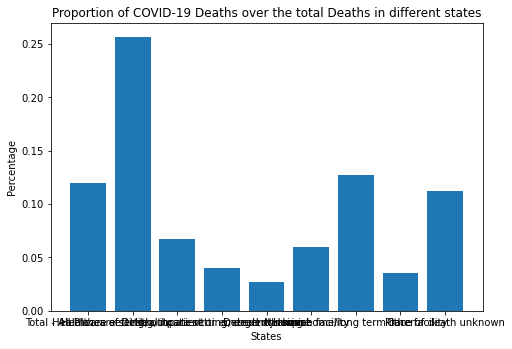

In [6]:
dfdeath3=dfdeath[dfdeath['State']=='United States']
#dfdeath3=dfdeath3[dfdeath2['Place of Death']=='Total - All Places of Death']
dfdeath3=dfdeath3[dfdeath3['Age group']=='All Ages']

#dfdeath3
label=dfdeath["Place of Death"].unique()
plotdeath(dfdeath3)

In [7]:
dfna=df.drop(['Footnote','Year','Month'],axis=1)
dfna=dfna.dropna()

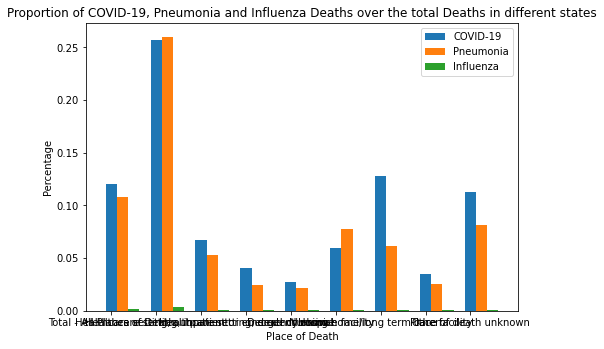

In [8]:
dfdis=df[['Place of Death','Total Deaths','COVID-19 Deaths','Pneumonia Deaths','Influenza Deaths','Group','Age group','State']]
dfdis=dfdis[dfdis['Group']=='By Total']
dfdis=dfdis[dfdis['Age group']=='All Ages']
dfdis=dfdis[dfdis['State']=='United States']
#dfdis=dfdis[['Place of Deaths','Total Deaths','Pneumonia Deaths','Influenza Deaths']]

label=dfdis["Place of Death"].unique()

def plotdisease(df):
    df=np.array(df)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x = np.arange(len(label))
    darray=np.array(df)
    perc=darray[:,2]/darray[:,1]
    perc2=darray[:,3]/darray[:,1]
    perc3=darray[:,4]/darray[:,1]
    ax.bar(x+0.00,perc,width=0.25,label="COVID-19")
    ax.bar(x+0.25,perc2,width=0.25,label="Pneumonia")
    ax.bar(x+0.5,perc3,width=0.25,label="Influenza")
    plt.title("Proportion of COVID-19, Pneumonia and Influenza Deaths over the total Deaths in different states")
    plt.xlabel("Place of Death")
    plt.ylabel("Percentage")
    ax.legend()
    ax.set_xticks(x)
    ax.set_xticklabels(label)
    plt.show()
plotdisease(dfdis)

## 2. Case of COVID-19 and the influence of geolocation in the number of cases

In [9]:
#load csv data
dftot=pd.read_csv('../Data/tot_population.csv') #https://www.census.gov/data/datasets/time-series/demo/popest/2010s-national-total.html#par_textimage_1810472256
dfcase2=pd.read_csv('../Data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')#https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36
dfcase2['submission_date'] =pd.to_datetime(dfcase2.submission_date)
dfcase2=dfcase2.sort_values(by='submission_date', key=pd.to_datetime)
#dftot= dftot.Population.replace('\s+', ' ', regex=True)

In [10]:
dfcase2

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
16996,2020-01-22,NY,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
29473,2020-01-22,ME,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
12966,2020-01-22,HI,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Not agree,Not agree
21836,2020-01-22,KS,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,NaN
20664,2020-01-22,MP,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32973,2021-10-15,AL,813481,606980.0,206501.0,787,308.0,15179,11727.0,3452.0,37,12.0,10/16/2021 01:26:43 PM,Agree,Agree
23670,2021-10-15,AS,3,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,10/16/2021 01:26:43 PM,NaN,NaN
24514,2021-10-15,SD,149996,NaN,NaN,318,51.0,2189,1811.0,378.0,7,0.0,10/16/2021 01:26:43 PM,NaN,Agree
1652,2021-10-15,CA,4784395,4571467.0,212928.0,6188,0.0,70150,NaN,NaN,140,0.0,10/16/2021 01:26:43 PM,Agree,Not agree


In [11]:
#make dataset for each state
dfcaseNY=dfcase2[dfcase2['state']=='NY'] #New York
dfcaseME=dfcase2[dfcase2['state']=='ME'] #Maine
dfcaseHI=dfcase2[dfcase2['state']=='HI'] #Hawaii out of met
dfcaseKS=dfcase2[dfcase2['state']=='KS'] #Kansas
dfcaseMP=dfcase2[dfcase2['state']=='MP'] #Northern Mariana Islands out of met
dfcaseID=dfcase2[dfcase2['state']=='ID'] #Idaho
dfcaseNM=dfcase2[dfcase2['state']=='NM'] #New Mexico
dfcaseVA=dfcase2[dfcase2['state']=='VA'] #Virginia
dfcaseTN=dfcase2[dfcase2['state']=='TN'] #Tennessee
dfcaseWY=dfcase2[dfcase2['state']=='WY'] #Wyoming
dfcaseMI=dfcase2[dfcase2['state']=='MI'] #Michigan
dfcaseIN=dfcase2[dfcase2['state']=='IN'] #Indiana
dfcaseWA=dfcase2[dfcase2['state']=='WA'] #Washington
dfcaseOK=dfcase2[dfcase2['state']=='OK'] #Oklahoma
dfcaseLA=dfcase2[dfcase2['state']=='LA'] #Louisiana
dfcaseUT=dfcase2[dfcase2['state']=='UT'] #Utah
dfcasePW=dfcase2[dfcase2['state']=='PW'] #Palau out of met
dfcaseOR=dfcase2[dfcase2['state']=='OR'] #Oregon
dfcaseMO=dfcase2[dfcase2['state']=='MO'] #Missouri
dfcaseNYC=dfcase2[dfcase2['state']=='NYC'] #New York City? can take it out
dfcasePA=dfcase2[dfcase2['state']=='PA'] #Pennsylvania
dfcaseVI=dfcase2[dfcase2['state']=='VI'] #Virgin Islands out of met
dfcaseOH=dfcase2[dfcase2['state']=='OH'] #Ohio
dfcaseMA=dfcase2[dfcase2['state']=='MA'] #Massachusetts
dfcaseSD=dfcase2[dfcase2['state']=='SD'] #South Dakota
dfcaseKY=dfcase2[dfcase2['state']=='KY'] #Kentucky
dfcaseFL=dfcase2[dfcase2['state']=='FL'] #Florida
dfcaseAK=dfcase2[dfcase2['state']=='AK'] #Alaska out of met
dfcaseAR=dfcase2[dfcase2['state']=='AR'] #Arkansas
dfcaseWV=dfcase2[dfcase2['state']=='WV'] #West Virginia
dfcaseRMI=dfcase2[dfcase2['state']=='RMI'] #Republic of the Marshall Islands out of met
dfcaseGU=dfcase2[dfcase2['state']=='GU'] #Guam out of met
dfcaseNH=dfcase2[dfcase2['state']=='NH'] #New Hampshire
dfcaseCO=dfcase2[dfcase2['state']=='CO'] #Colorado
dfcasePR=dfcase2[dfcase2['state']=='PR'] #Puerto Rico out of met
dfcaseMT=dfcase2[dfcase2['state']=='MT'] #Montana
dfcaseRI=dfcase2[dfcase2['state']=='RI'] #Rhode Island
dfcaseTX=dfcase2[dfcase2['state']=='TX'] #Texas
dfcaseVT=dfcase2[dfcase2['state']=='VT'] #Vermont
dfcaseNC=dfcase2[dfcase2['state']=='NC'] #North Carolina
dfcaseDC=dfcase2[dfcase2['state']=='DC'] #District of Columbia
dfcaseND=dfcase2[dfcase2['state']=='ND'] #North Dakota
dfcaseNV=dfcase2[dfcase2['state']=='NV'] #Nevada
dfcaseSC=dfcase2[dfcase2['state']=='SC'] #South Carolina
dfcaseMD=dfcase2[dfcase2['state']=='MD'] #Maryland
dfcaseIA=dfcase2[dfcase2['state']=='IA'] #Iowa
dfcaseGA=dfcase2[dfcase2['state']=='GA'] #Georgia
dfcaseNJ=dfcase2[dfcase2['state']=='NJ'] #New Jersey
dfcaseMS=dfcase2[dfcase2['state']=='MS'] #Mississipi
dfcaseAL=dfcase2[dfcase2['state']=='AL'] #Alabama
dfcaseCA=dfcase2[dfcase2['state']=='CA'] #California
dfcaseAZ=dfcase2[dfcase2['state']=='AZ'] #Arizona
dfcaseIL=dfcase2[dfcase2['state']=='IL'] #Illinois
dfcaseCT=dfcase2[dfcase2['state']=='CT'] #Connecticut
dfcaseAS=dfcase2[dfcase2['state']=='AS'] #American Samoa out of met
dfcaseWI=dfcase2[dfcase2['state']=='WI'] #Wisconsin
dfcaseMN=dfcase2[dfcase2['state']=='MN'] #Minnesota
dfcaseNE=dfcase2[dfcase2['state']=='NE'] #Nebraska
dfcaseDE=dfcase2[dfcase2['state']=='DE'] #Delaware
dfcaseFSM=dfcase2[dfcase2['state']=='FSM'] #Micronesia out of met

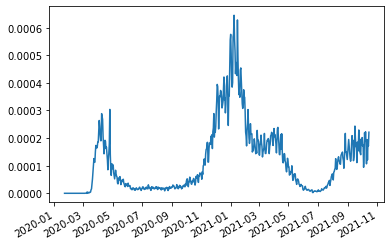

In [12]:
def plotcase(df):
    totpop=int(''.join(dftot[dftot['State']==np.array(df['state'].unique())[0]].iloc[0]['Population'].split('\u202f')))
    x=np.array(df['submission_date'])
    y=np.array(df['new_case'])/totpop
    return x,y
x,y=plotcase(dfcaseNY)
plt.plot(x,y)
plt.gcf().autofmt_xdate()
plt.plot()
plt.show()

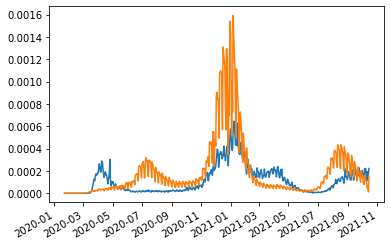

In [13]:
def plotcomp(df1,df2):
    totpop1=int(''.join(dftot[dftot['State']==np.array(df1['state'].unique())[0]].iloc[0]['Population'].split('\u202f')))
    totpop2=int(''.join(dftot[dftot['State']==np.array(df2['state'].unique())[0]].iloc[0]['Population'].split('\u202f')))
    x1=np.array(df1['submission_date'])
    y1=np.array(df1['new_case'])/totpop1
    x2=np.array(df2['submission_date'])
    y2=np.array(df2['new_case'])/totpop2
    return x1,x2,y1,y2
x1,x2,y1,y2=plotcomp(dfcaseNY,dfcaseCA)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.gcf().autofmt_xdate()
plt.plot()
plt.show()

In [14]:
#state to acronyms
#source from: https://gist.github.com/rogerallen/1583593
stoa={
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "District of Columbia": "DC",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"}

In [15]:
#construct dictionary of neighboring states for each state
#source from: https://state.1keydata.com/bordering-states-list.php
#We assume that water borders and land borders have no difference
neigh={
    "Alabama": ['Florida', 'Georgia', 'Mississippi', 'Tennessee'],
    "Alaska": None,
    "Arizona": ['California', 'Colorado', 'Nevada', 'New Mexico', 'Utah'],
    "Arkansas": ['Louisiana', 'Mississippi', 'Missouri', 'Oklahoma', 'Tennessee', 'Texas'],
    "California": ['Arizona', 'Nevada', 'Oregon'],
    "Colorado": ['Arizona', 'Kansas', 'Nebraska', 'New Mexico', 'Oklahoma', 'Utah', 'Wyoming'],
    "Connecticut": ['Massachusetts', 'New York', 'Rhode Island'],
    "Delaware": ['Maryland', 'New Jersey', 'Pennsylvania'],
    "Florida": ['Alabama', 'Georgia'],
    "Georgia": ['Alabama', 'Florida', 'North Carolina', 'South Carolina', 'Tennessee'],
    "Hawaii": None,
    "Idaho": ['Montana', 'Nevada', 'Oregon', 'Utah', 'Washington', 'Wyoming'],
    "Illinois": ['Indiana', 'Iowa', 'Michigan', 'Kentucky', 'Missouri', 'Wisconsin'],
    "Indiana": ['Illinois', 'Kentucky', 'Michigan', 'Ohio'],
    "Iowa": ['Illinois', 'Minnesota', 'Missouri', 'Nebraska', 'South Dakota', 'Wisconsin'],
    "Kansas": ['Colorado', 'Missouri', 'Nebraska', 'Oklahoma'],
    "Kentucky": ['Illinois', 'Indiana', 'Missouri', 'Ohio', 'Tennessee', 'Virginia', 'West Virginia'],
    "Louisiana": ['Arkansas', 'Mississippi', 'Texas'],
    "Maine": ['New Hampshire'],
    "Maryland": ['Delaware', 'Pennsylvania', 'Virginia', 'West Virginia'],
    "Massachusetts": ['Connecticut', 'New Hampshire', 'New York', 'Rhode Island', 'Vermont'],
    "Michigan": ['Illinois', 'Indiana', 'Minnesota', 'Ohio', 'Wisconsin'],
    "Minnesota": ['Iowa', 'Michigan', 'North Dakota', 'South Dakota', 'Wisconsin'],
    "Mississippi": ['Alabama', 'Arkanssas', 'Louisiana', 'Tennessee'],
    "Missouri": ['Arkansas', 'Illinois', 'Iowa', 'Kansas', 'Kentucky', 'Nebraska', 'Oklahoma', 'Tennessee'],
    "Montana": ['Idaho', 'North Dakota', 'South Dakota', 'Wyoming'],
    "Nebraska": ['Colorado', 'Iowa', 'Kansas', 'Missouri', 'South Dakota', 'Wyoming'],
    "Nevada": ['Arizona', 'California', 'Idaho', 'Oregon', 'Utah'],
    "New Hampshire": ['Maine', 'Massachusetts', 'Vermont'],
    "New Jersey": ['Delaware', 'New York', 'Pennsylvania'],
    "New Mexico": ['Arizona', 'Colorado', 'Oklahoma', 'Texas', 'Utah'],
    "New York": ['Connecticut', 'Massachusetts', 'New Jersey', 'Pennsylvania', 'Rhode Island', 'Vermont'],
    "North Carolina": ['Georgia', 'South Carolina', 'Tennessee', 'Virginia'],
    "North Dakota": ['Minnesota', 'Montana', 'South Dakota'],
    "Ohio": ['Indiana', 'Kentucky', 'Michigan', 'Pennsylvania', 'West Virginia'],
    "Oklahoma": ['Arkansas', 'Colorado', 'Kansas', 'Missouri', 'New Mexico', 'Texas'],
    "Oregon": ['California', 'Idaho', 'Nevada', 'Washington'],
    "Pennsylvania": ['Delaware', 'Maryland', 'New Jersey', 'New York', 'Ohio', 'West Virginia'],
    "Rhode Island": ['Connecticut', 'Massachusetts', 'New York'],
    "South Carolina": ['Georgia', 'North Carolina'],
    "South Dakota": ['Iowa', 'Minnesota', 'Montana', 'Nebraska', 'North Dakota', 'Wyoming'],
    "Tennessee": ['Alabama', 'Arkansas', 'Georgia', 'Kentucky', 'Mississippi', 'Missouri', 'North Carolina', 'Virginia'],
    "Texas": ['Arkansas', 'Louisiana', 'New Mexico', 'Oklahoma'],
    "Utah": ['Arizona', 'Colorado', 'Idaho', 'Nevada', 'New Mexico', 'Wyoming'],
    "Vermont": ['Massachusetts', 'New Hampshire', 'New York'],
    "Virginia": ['Kentucky', 'Maryland', 'North Carolina', 'Tennessee', 'West Virginia'],
    "Washington": ['Idaho', 'Oregon'],
    "West Virginia": ['Kentucky', 'Maryland', 'Ohio', 'Pennsylvania', 'Virginia'],
    "Wisconsin": ['Illinois', 'Iowa', 'Michigan', 'Minnesota'],
    "Wyoming": ['Colorado', 'Idaho', 'Montana', 'Nebraska', 'South Dakota', 'Utah']}

In [16]:
#acronyms to state
#source from:https://code.activestate.com/recipes/577305-python-dictionary-of-us-states-and-territories/
atos = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [17]:
states=list(dfcase2['state'].unique())
states.remove("MP")
states.remove("PR")
states.remove("FSM")
states.remove("NYC")
states.remove("PW")
states.remove("VI")
states.remove("RMI")
states.remove("AS")
states.remove("DC")
states.remove("GU")
states.remove("HI")
states.remove("AK")
def compcorr():
    totNY=int(''.join(dftot[dftot['State']=="NY"].iloc[0]['Population'].split('\u202f')))
    dfstate=pd.DataFrame({"NY":np.array(dfcaseNY["new_case"])/totNY})
    for i in states[1:]:
        totpop=int(''.join(dftot[dftot['State']==i].iloc[0]['Population'].split('\u202f')))
        dfs=np.array(dfcase2[dfcase2['state']==i].new_case)/totpop
        dfstate[i]=dfs
    return dfstate.corr()

In [18]:
corr=compcorr()
corr.style.background_gradient(cmap='coolwarm')

,NY,ME,KS,ID,NM,VA,TN,WY,MI,IN,WA,OK,LA,UT,OR,MO,PA,OH,MA,SD,KY,FL,AR,WV,NH,CO,MT,RI,TX,VT,NC,ND,NV,SC,MD,IA,GA,NJ,MS,AL,CA,AZ,IL,CT,WI,MN,NE,DE
NY,1.000000,0.634615,0.365851,0.473925,0.620989,0.807827,0.538599,0.386798,0.439893,0.684977,0.597807,0.614103,0.366579,0.650928,0.490429,0.367290,0.854624,0.685907,0.903296,0.322688,0.591810,0.413884,0.578947,0.694146,0.814494,0.592132,0.404362,0.823202,0.609258,0.660928,0.675509,0.163189,0.640176,0.673704,0.781339,0.400916,0.655485,0.897502,0.460653,0.485047,0.758880,0.721652,0.581615,0.526083,0.414971,0.398335,0.481181,0.864181
ME,0.634615,1.000000,0.335627,0.561083,0.462786,0.689315,0.516112,0.480509,0.523865,0.544790,0.639423,0.514966,0.311480,0.512272,0.611615,0.349918,0.679672,0.584567,0.564531,0.287477,0.623631,0.403086,0.449863,0.690000,0.711849,0.480854,0.518081,0.530783,0.567595,0.627539,0.624415,0.258726,0.466250,0.532869,0.592765,0.371260,0.544623,0.541748,0.421221,0.456267,0.468080,0.487237,0.411197,0.401136,0.377174,0.413571,0.432464,0.659973
KS,0.365851,0.335627,1.000000,0.503373,0.535434,0.447231,0.428546,0.562376,0.401905,0.517856,0.441734,0.490938,0.308784,0.482519,0.379959,0.601519,0.422061,0.487415,0.381653,0.435859,0.540168,0.360928,0.458674,0.408241,0.402791,0.480806,0.401130,0.405856,0.424705,0.227575,0.397442,0.424528,0.478368,0.376875,0.448512,0.480664,0.391225,0.318187,0.486263,0.542013,0.481417,0.356050,0.488597,0.617698,0.431363,0.392073,0.566161,0.459203
ID,0.473925,0.561083,0.503373,1.000000,0.776177,0.666181,0.776013,0.787998,0.611174,0.800912,0.726470,0.799134,0.423876,0.785625,0.718861,0.686728,0.693026,0.803201,0.544182,0.717851,0.808556,0.501975,0.653642,0.733883,0.611628,0.739981,0.849157,0.642466,0.690239,0.482620,0.717602,0.710023,0.728636,0.544574,0.622930,0.746023,0.632443,0.463763,0.617387,0.645151,0.537355,0.511226,0.738662,0.388536,0.802108,0.707404,0.801525,0.629404
NM,0.620989,0.462786,0.535434,0.776177,1.000000,0.659183,0.718545,0.743960,0.564128,0.913780,0.696258,0.830899,0.464766,0.872279,0.642589,0.677584,0.782882,0.777793,0.670814,0.709313,0.746395,0.487761,0.702430,0.693835,0.651248,0.882723,0.730720,0.819157,0.632088,0.445405,0.676046,0.593097,0.838953,0.576995,0.737002,0.770224,0.620867,0.631830,0.601221,0.637510,0.721293,0.634111,0.872845,0.455090,0.804310,0.746133,0.847689,0.719200
VA,0.807827,0.689315,0.447231,0.666181,0.659183,1.000000,0.708424,0.551368,0.413054,0.738055,0.728146,0.746373,0.508178,0.712826,0.687321,0.500109,0.788637,0.774818,0.791355,0.406709,0.805572,0.611256,0.717713,0.790390,0.803487,0.569904,0.557709,0.730171,0.798285,0.643192,0.817894,0.304143,0.710107,0.829589,0.772397,0.497805,0.828617,0.702026,0.681038,0.691950,0.742828,0.747953,0.599197,0.480632,0.511717,0.460699,0.562061,0.833436
TN,0.538599,0.516112,0.428546,0.776013,0.718545,0.708424,1.000000,0.635985,0.419383,0.795346,0.762436,0.905734,0.628941,0.734285,0.784882,0.636567,0.684900,0.723709,0.565565,0.546449,0.870845,0.726864,0.835498,0.725877,0.568830,0.640183,0.671967,0.688928,0.852302,0.441765,0.920182,0.469385,0.765419,0.711928,0.631451,0.628365,0.842931,0.502689,0.815757,0.807046,0.675666,0.618967,0.679006,0.302991,0.664535,0.521220,0.705915,0.645957
WY,0.386798,0.480509,0.562376,0.787998,0.743960,0.551368,0.635985,1.000000,0.604281,0.761299,0.703652,0.692208,0.423189,0.707393,0.694131,0.698060,0.562963,0.738233,0.431927,0.713480,0.767497,0.430779,0.546156,0.667272,0.542234,0.744456,0.785675,0.517962,0.544661,0.437528,0.562989,0.681765,0.611049,0.483471,0.501557,0.729257,0.494155,0.397586,0.556904,0.584177,0.394698,0.423864,0.717703,0.440349,0.742826,0.726975,0.781087,0.546910
MI,0.439893,0.523865,0.401905,0.611174,0.564128,0.413054,0.419383,0.604281,1.000000,0.565030,0.481420,0.433556,0.126423,0.508812,0.437301,0.474437,0.625075,0.557281,0.465387,0.591821,0.460904,0.220324,0.248430,0.482139,0.559404,0.707302,0.595011,0.566858,0.327637,0.527287,0.374306,0.602707,0.410737,0.225067,0.562754,0.609898,0.248893,0.571389,0.249387,0.301098,0.239240,0.2

In [19]:
corr2=corr
for i in states:
    for j in states:
        if atos[i] in neigh[atos[j]]:
            corr2[i][j]=1.
        else:
            corr2[i][j]=0.


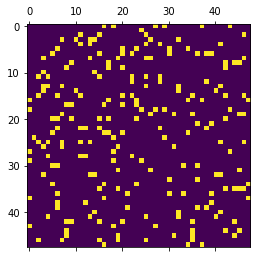

In [20]:
corr3=corr2.astype(float)
plt.matshow(corr3)

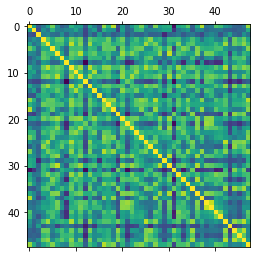

In [21]:
plt.matshow(compcorr())

In [22]:
corr1=compcorr()
def isneighimp():
    a=0
    b=0
    i1=0
    i2=0
    for i in states:
        for j in states:
            if i!=j:
                if corr2[i][j]==1.:
                    a+=corr1[i][j]
                    i1+=1
                else:
                    b+=corr1[i][j]
                    i2+=1
    return a/i1,b/i2

In [23]:
isneighimp()

(0.7575626038139122, 0.5900159155676525)

In [24]:
def compcorrdeath():
    totNY=int(''.join(dftot[dftot['State']=="NY"].iloc[0]['Population'].split('\u202f')))
    dfstate=pd.DataFrame({"NY":np.array(dfcaseNY["new_death"])/totNY})
    for i in states[1:]:
        totpop=int(''.join(dftot[dftot['State']==i].iloc[0]['Population'].split('\u202f')))
        dfs=np.array(dfcase2[dfcase2['state']==i].new_death)/totpop
        dfstate[i]=dfs
    return dfstate.corr()

In [25]:
compcorrdeath()

,NY,ME,KS,ID,NM,VA,TN,WY,MI,IN,...,MS,AL,CA,AZ,IL,CT,WI,MN,NE,DE
NY,1.000000,0.260666,0.192525,0.095574,0.352527,0.187205,0.312846,0.098274,0.672174,0.523080,...,0.336385,0.289427,0.475234,0.286291,0.498795,0.626889,0.255792,0.309192,0.199676,0.262701
ME,0.260666,1.000000,0.342063,0.317929,0.342887,0.277159,0.441429,0.269544,0.248430,0.377415,...,0.301998,0.374149,0.441841,0.337349,0.301203,0.253303,0.262812,0.200780,0.282666,0.134345
KS,0.192525,0.342063,1.000000,0.257414,0.391195,0.226774,0.410340,0.003518,0.219288,0.388616,...,0.348463,0.353989,0.388567,0.290113,0.373344,0.236585,0.306113,0.326110,0.293457,0.317280
ID,0.095574,0.317929,0.257414,1.000000,0.395118,0.238915,0.506659,0.353417,0.203440,0.452270,...,0.390222,0.417784,0.261970,0.269110,0.328752,0.100298,0.449470,0.358625,0.446310,0.145532
NM,0.352527,0.342887,0.391195,0.395118,1.000000,0.197220,0.773880,0.277672,0.597594,0.882062,...,0.667554,0.612602,0.618163,0.362937,0.709722,0.294883,0.660912,0.684403,0.606678,0.180045
VA,0.187205,0.277159,0.226774,0.238915,0.197220,1.000000,0.253214,0.182400,0.103944,0.226517,...,0.185777,0.251263,0.320231,0.303640,0.216596,0.208007,0.218140,0.115649,0.196565,0.235490
TN,0.312846,0.441429,0.410340,0.506659,0.773880,0.253214,1.000000,0.361923,0.398197,0.818198,...,0.704904,0.832806,0.795835,0.533497,0.562400,0.159435,0.605683,0.546693,0.502297,0.169859
WY,0.098274,0.269544,0.003518,0.353417,0.277672,0.182400,0.361923,1.000000,0.150156,0.288054,...,0.302958,0.277066,0.220492,0.321449,0.213948,0.098179,0.360177,0.175000,0.311984,0.073329
MI,0.672174,0.248430,0.219288,0.203440,0.597594,0.103944,0.398197,0.150156,1.000000,0.689810,...,0.382553,0.214315,0.349155,0.145872,0.629223,0.553510,0.447654,0.528061,0.400919,0.185097
IN,0.523080,0.377415,0.388616,0.452270,0.882062,0.226517,0.818198,0.288054,0.689810,1.000000,...,0.702990,0.635332,0.674667,0.377663,0.762821,0.427049,0.648516,0.690846,0.576036,0.207109


In [26]:
def isneighimpdeath():
    corr4=compcorrdeath()
    a=0
    b=0
    i1=0
    i2=0
    for i in states:
        for j in states:
            if i!=j:
                if corr2[i][j]==1.:
                    a+=corr4[i][j]
                    i1+=1
                else:
                    b+=corr4[i][j]
                    i2+=1
    return a/i1,b/i2

In [27]:
isneighimpdeath()

(0.4804464631622195, 0.34860163565334673)

## Make dataset: new cases and new deaths per month

In [28]:
#construction of list of end dates
ldate=[]
ldate.append(pd.to_datetime("01/22/2020"))
ldate.append(pd.to_datetime("01/31/2020"))
ldate.append(pd.to_datetime("02/29/2020"))
ldate.append(pd.to_datetime("03/31/2020"))
ldate.append(pd.to_datetime("04/30/2020"))
ldate.append(pd.to_datetime("05/31/2020"))
ldate.append(pd.to_datetime("06/30/2020"))
ldate.append(pd.to_datetime("07/31/2020"))
ldate.append(pd.to_datetime("08/31/2020"))
ldate.append(pd.to_datetime("09/30/2020"))
ldate.append(pd.to_datetime("10/31/2020"))
ldate.append(pd.to_datetime("11/30/2020"))
ldate.append(pd.to_datetime("12/31/2020"))
ldate.append(pd.to_datetime("01/31/2021"))
ldate.append(pd.to_datetime("02/28/2021"))
ldate.append(pd.to_datetime("03/31/2021"))
ldate.append(pd.to_datetime("04/30/2021"))
ldate.append(pd.to_datetime("05/31/2021"))
ldate.append(pd.to_datetime("06/30/2021"))
ldate.append(pd.to_datetime("07/31/2021"))
ldate.append(pd.to_datetime("08/31/2021"))
ldate.append(pd.to_datetime("09/30/2021"))
ldate.append(pd.to_datetime("10/15/2021"))

In [29]:
states2=[]
for i in states:
    states2.append(atos[i])

In [30]:
#make dataset
dfmonth=pd.DataFrame({})
dfmonth["month_number"]=np.tile(np.arange(21),48)
year=np.repeat(2020,12)
year2=np.repeat(2021,9)
years=np.concatenate((year,year2),axis=None)
month=np.arange(1,13)
month2=np.arange(1,10)
months=np.concatenate((month,month2),axis=None)
dfmonth["year"]=np.tile(years,48)
dfmonth["month"]=np.tile(months,48)
dfmonth["state"]=np.repeat(states2,21,axis=0)
ltot=[]
ltotd=[]
lsub=[]
for i in states:
    dfi=dfcase2[dfcase2["state"]==i]
    for j in range(len(ldate)-2):
        tot1=dfi[dfi["submission_date"]==ldate[j]].iloc[0]["tot_cases"]
        tot2=dfi[dfi["submission_date"]==ldate[j+1]].iloc[0]["tot_cases"]
        totd1=dfi[dfi["submission_date"]==ldate[j]].iloc[0]["tot_death"]
        totd2=dfi[dfi["submission_date"]==ldate[j+1]].iloc[0]["tot_death"]
        casepm=tot2-tot1
        dpm=totd2-totd1
        ltot.append(casepm)
        ltotd.append(dpm)
        lsub.append(ldate[j+1])
dfmonth["end_date"]=lsub
dfmonth["new_deaths_per_month"]=ltotd
dfmonth["new_cases_per_month"]=ltot

In [31]:
dfmonth

,month_number,year,month,state,end_date,new_deaths_per_month,new_cases_per_month
0,0,2020,1,New York,2020-01-31,0,0
1,1,2020,2,New York,2020-02-29,0,0
2,2,2020,3,New York,2020-03-31,211,32656
3,3,2020,4,New York,2020-04-30,5134,104238
4,4,2020,5,New York,2020-05-31,2785,30573
...,...,...,...,...,...,...,...
1003,16,2021,5,Delaware,2021-05-31,36,3619
1004,17,2021,6,Delaware,2021-06-30,33,868
1005,18,2021,7,Delaware,2021-07-31,139,1663
1006,19,2021,8,Delaware,2021-08-31,47,8445


In [32]:
#save dataset
#dfmonth.to_csv("case_per_month.csv")

In [33]:
import dash #installation of dash might be needed: 
#pip install jupyter-dash #uncomment this line to install
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

app = dash.Dash(__name__)

available_indicators = dftot['State'].unique()

app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='xaxis-column1',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='NY'
            ),
            #dcc.RadioItems(
                #id='xaxis-type',
                #options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                #value='Linear',
                #labelStyle={'display': 'inline-block'}
            #)
        ], style={'width': '48%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                id='xaxis-column2',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value='CA'
            ),
            #dcc.RadioItems(
                #id='yaxis-type',
                #options=[{'label': i, 'value': i} for i in ['Linear', 'Log']],
                #value='Linear',
                #labelStyle={'display': 'inline-block'}
            #)
        ], style={'width': '48%', 'float': 'right', 'display': 'inline-block'})
    ]),

    dcc.Graph(id='indicator-graphic'),

    #dcc.Slider(
    #    id='year--slider',
    #    min=df['Year'].min(),
    #    max=df['Year'].max(),
    #    value=df['Year'].max(),
    #    marks={str(year): str(year) for year in df['Year'].unique()},
    #    step=None
    #)
])


@app.callback(
    Output('indicator-graphic', 'figure'),
    Input('xaxis-column1', 'value'),
    Input('xaxis-column2', 'value'))
def update_graph(xaxis_column_name1, xaxis_column_name2):
    #dff = df[df['Year'] == year_value]
    dfcase21=dfcase2[dfcase2['state']==xaxis_column_name1]
    dfcase22=dfcase2[dfcase2['state']==xaxis_column_name2]
    statement=None
    if atos[xaxis_column_name1] in neigh[atos[xaxis_column_name2]]:
        statement="They are neighbors!"
    else:
        statement="They are not neighbors!"
    x1,x2,y1,y2=plotcomp(dfcase21,dfcase22)
    fig = px.line(x=x1,y=y1,labels={'x':'Date', 'y':'Percentage of new cases of COVID-19 over the total population'})
    fig.add_scatter(x=x2,y=y2)
    fig.data[0].showlegend=True
    fig.data[1].showlegend=True
    fig.data[0].name = xaxis_column_name1
    fig.data[1].name = xaxis_column_name2
    
    fig.update_layout(title_text="Comparison of COVID-19 cases between "+xaxis_column_name1+" and "+xaxis_column_name2+" : "+statement)
    #fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    #fig.update_xaxes(title=xaxis_column_name,
    #                 type='linear' if xaxis_type == 'Linear' else 'log')

    #fig.update_yaxes(title=yaxis_column_name,
    #                 type='linear' if yaxis_type == 'Linear' else 'log')

    return fig

if __name__ == '__main__':
    app.run_server(debug=False)
    

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Oct/2021 15:16:42] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 15:16:43] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 15:16:43] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 15:16:47] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 15:16:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 15:17:18] "POST /_dash-update-component HTTP/1.1" 200 -
